In [ ]:
#check CPU/GPU
import torch
print(f"PyTorch版本: {torch.__version__}")
print(f"CUDA是否可用: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU设备: {torch.cuda.get_device_name(0)}")
else:
    print("当前使用CPU")

PyTorch版本: 2.9.0+cu128
CUDA是否可用: True
GPU设备: Tesla T4


In [ ]:
!pip install --upgrade torch torchvision matplotlib

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

print("All libraries are successfully imported!")
print(f"PyTorch Version: {torch.__version__}")
print(f"Torchvision Version: {torchvision.__version__}")

All libraries are successfully imported!
PyTorch Version: 2.9.0+cu128
Torchvision Version: 0.24.0+cu128


In [ ]:
# 设置数据转换（先用最基础的）
transform = transforms.Compose([
    transforms.ToTensor(),  # 转换为Tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 标准化
])

# 下载训练集
print("正在下载CIFAR-10训练集...")
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# 下载测试集
print("正在下载CIFAR-10测试集...")
testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

print(f"✅ 数据集下载完成！")
print(f"训练集大小: {len(trainset)}")
print(f"测试集大小: {len(testset)}")

正在下载CIFAR-10训练集...


100%|██████████| 170M/170M [00:14<00:00, 12.0MB/s]


正在下载CIFAR-10测试集...
✅ 数据集下载完成！
训练集大小: 50000
测试集大小: 10000


In [ ]:
# 设置批次大小
batch_size = 128

# 创建数据加载器
trainloader = DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True,  # 训练时打乱数据
    num_workers=2  # 多线程加载
)

testloader = DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2
)

# CIFAR-10的类别
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

print(f"✅ 数据加载器创建完成！")
print(f"训练批次数: {len(trainloader)}")
print(f"测试批次数: {len(testloader)}")

✅ 数据加载器创建完成！
训练批次数: 391
测试批次数: 79


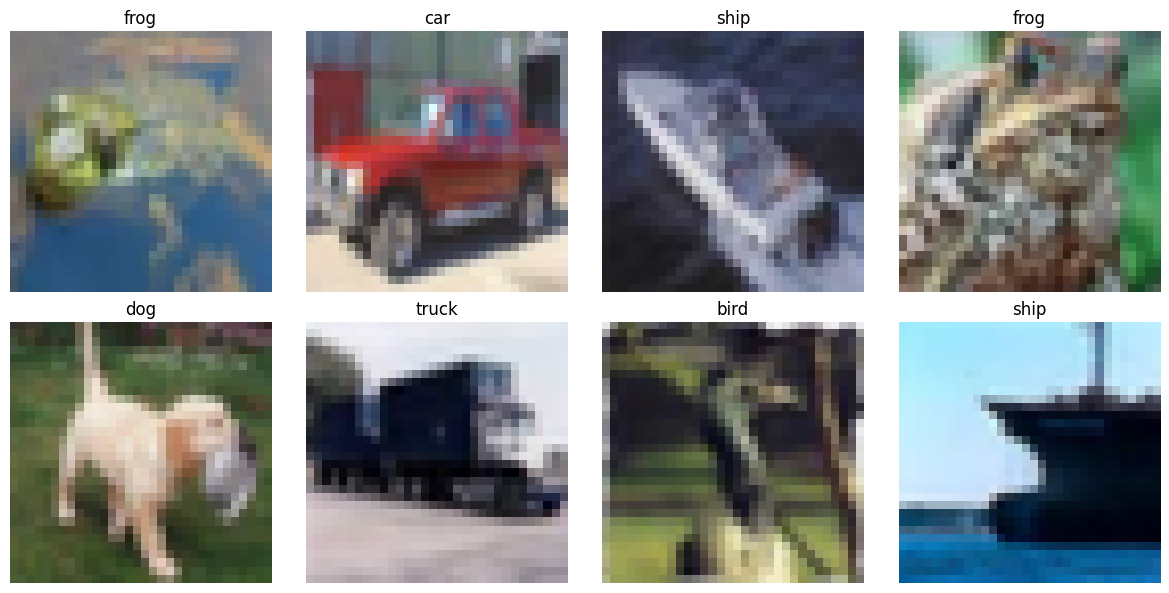

✅ 如果你看到了8张32×32的图片，说明数据加载成功！


In [ ]:
# 获取一批训练图片
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 显示图片的函数
def imshow(img):
    img = img / 2 + 0.5  # 反标准化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# 显示前8张图片
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    img = images[i] / 2 + 0.5  # 反标准化
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.set_title(classes[labels[i]])
    ax.axis('off')

plt.tight_layout()
plt.show()

print("✅ 如果你看到了8张32×32的图片，说明数据加载成功！")

In [ ]:
# 定义一个简单的CNN模型
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # 卷积层
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # 输入3通道(RGB)，输出32通道
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)

        # 池化层
        self.pool = nn.MaxPool2d(2, 2)

        # 全连接层
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)  # 10个类别

        # Dropout
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # 卷积 + ReLU + 池化
        x = self.pool(torch.relu(self.conv1(x)))  # 32x32 -> 16x16
        x = self.pool(torch.relu(self.conv2(x)))  # 16x16 -> 8x8
        x = self.pool(torch.relu(self.conv3(x)))  # 8x8 -> 4x4

        # 展平
        x = x.view(-1, 128 * 4 * 4)

        # 全连接层
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# 创建模型实例
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

print(f"✅ 模型创建完成！使用设备: {device}")
print(f"\n模型结构:")
print(model)

# 计算参数数量
total_params = sum(p.numel() for p in model.parameters())
print(f"\n总参数量: {total_params:,}")

✅ 模型创建完成！使用设备: cuda

模型结构:
SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

总参数量: 620,362


In [ ]:
# 损失函数
criterion = nn.CrossEntropyLoss()

# 优化器
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("✅ 损失函数和优化器设置完成！")

✅ 损失函数和优化器设置完成！


In [ ]:
def train_model(model, trainloader, criterion, optimizer, epochs=10):
    """训练模型"""
    model.train()
    train_losses = []
    train_accuracies = []

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for i, (inputs, labels) in enumerate(trainloader):
            # 将数据移到GPU
            inputs, labels = inputs.to(device), labels.to(device)

            # 前向传播
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # 反向传播
            loss.backward()
            optimizer.step()

            # 统计
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            # 每100批次打印一次
            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(trainloader)}], '
                      f'Loss: {loss.item():.4f}, Acc: {100.*correct/total:.2f}%')

        # 记录每个epoch的平均损失和准确率
        epoch_loss = running_loss / len(trainloader)
        epoch_acc = 100. * correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f'Epoch [{epoch+1}/{epochs}] 完成 - '
              f'平均Loss: {epoch_loss:.4f}, 训练准确率: {epoch_acc:.2f}%\n')

    return train_losses, train_accuracies

print("✅ 训练函数定义完成！")

✅ 训练函数定义完成！


In [ ]:
# 训练5个epoch（先少训练几轮看看效果）
print("开始训练...\n")
train_losses, train_accs = train_model(
    model,
    trainloader,
    criterion,
    optimizer,
    epochs=5
)
print("✅ 训练完成！")

开始训练...

Epoch [1/5], Step [100/391], Loss: 1.6299, Acc: 30.19%
Epoch [1/5], Step [200/391], Loss: 1.3709, Acc: 36.30%
Epoch [1/5], Step [300/391], Loss: 1.2500, Acc: 40.20%
Epoch [1/5] 完成 - 平均Loss: 1.5621, 训练准确率: 42.84%

Epoch [2/5], Step [100/391], Loss: 1.2392, Acc: 54.84%
Epoch [2/5], Step [200/391], Loss: 1.2073, Acc: 56.24%
Epoch [2/5], Step [300/391], Loss: 1.1741, Acc: 57.45%
Epoch [2/5] 完成 - 平均Loss: 1.1765, 训练准确率: 58.04%

Epoch [3/5], Step [100/391], Loss: 1.1250, Acc: 63.01%
Epoch [3/5], Step [200/391], Loss: 1.0368, Acc: 64.03%
Epoch [3/5], Step [300/391], Loss: 0.9598, Acc: 64.51%
Epoch [3/5] 完成 - 平均Loss: 1.0004, 训练准确率: 64.76%

Epoch [4/5], Step [100/391], Loss: 0.7977, Acc: 68.46%
Epoch [4/5], Step [200/391], Loss: 0.8767, Acc: 68.65%
Epoch [4/5], Step [300/391], Loss: 0.8263, Acc: 68.85%
Epoch [4/5] 完成 - 平均Loss: 0.8827, 训练准确率: 69.03%

Epoch [5/5], Step [100/391], Loss: 0.8784, Acc: 71.97%
Epoch [5/5], Step [200/391], Loss: 0.9508, Acc: 72.18%
Epoch [5/5], Step [300/391], 

In [ ]:
def test_model(model, testloader):
    """测试模型"""
    model.eval()  # 设置为评估模式
    correct = 0
    total = 0

    with torch.no_grad():  # 测试时不需要计算梯度
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100. * correct / total
    print(f'测试集准确率: {accuracy:.2f}%')
    return accuracy

# 测试模型
test_acc = test_model(model, testloader)

测试集准确率: 72.72%


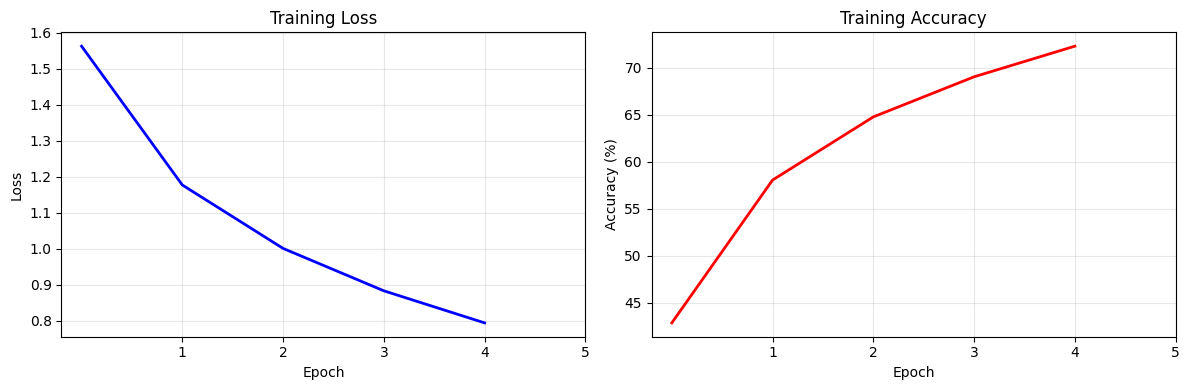

✅ 基础模型训练完成！测试准确率: 72.72%


In [ ]:
# 绘制损失和准确率曲线
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 创建epoch列表：[1, 2, 3, 4, 5] 而不是 [0, 1, 2, 3, 4]
epochs_list = list(range(1, len(train_losses) + 1))

# 损失曲线
ax1.plot(train_losses, 'b-', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')
ax1.set_xticks(epochs_list)
ax1.grid(True, alpha=0.3)

# 准确率曲线
ax2.plot(train_accs, 'r-', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Training Accuracy')
ax2.set_xticks(epochs_list)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"✅ 基础模型训练完成！测试准确率: {test_acc:.2f}%")

In [ ]:
# 保存模型
torch.save(model.state_dict(), 'simple_cnn_cifar10.pth')
print("✅ 模型已保存为 simple_cnn_cifar10.pth")

# 保存到Google Drive（可选）
# 首先挂载Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 保存到Drive
torch.save(model.state_dict(), '/content/drive/MyDrive/simple_cnn_cifar10.pth')
print("✅ 模型已保存到Google Drive")

✅ 模型已保存为 simple_cnn_cifar10.pth
Mounted at /content/drive
✅ 模型已保存到Google Drive


改进实验 #1: Data Augmentation

Data Augmentation（数据增强）通过对训练图片进行随机变换（翻转、裁剪、旋转等），人工扩充训练集，提高模型的泛化能力。

Using device: cuda
Loading CIFAR-10 with data augmentation...


100%|██████████| 170M/170M [00:13<00:00, 12.4MB/s]


✅ Data loaded with augmentation!
Training samples: 50000, Test samples: 10000


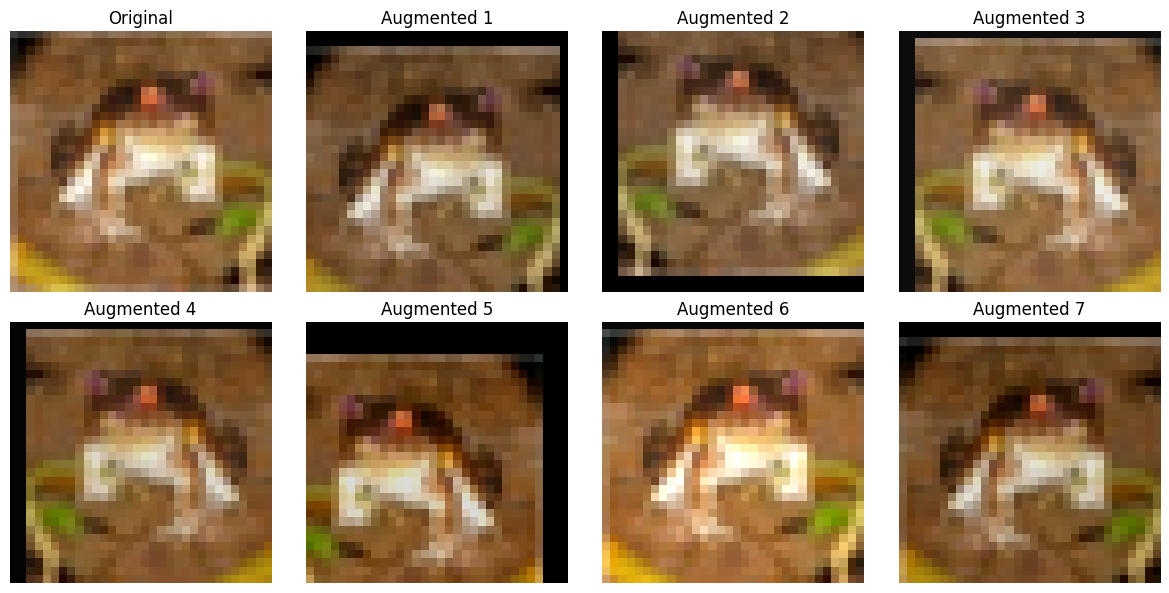

✅ Augmentation examples saved!
✅ Model created on cuda
Total parameters: 620,362
✅ Loss function and optimizer configured!
🚀 Starting training with Data Augmentation...

Training SimpleCNN + Data Augmentation

Epoch [1/10], Step [100/391], Loss: 1.7964, Acc: 25.51%
Epoch [1/10], Step [200/391], Loss: 1.7213, Acc: 31.64%
Epoch [1/10], Step [300/391], Loss: 1.5712, Acc: 35.29%

📊 Epoch [1/10] Summary:
   Train Loss: 1.6972
   Train Acc: 37.59%
   Test Acc: 50.55%
------------------------------------------------------------

Epoch [2/10], Step [100/391], Loss: 1.2960, Acc: 48.25%
Epoch [2/10], Step [200/391], Loss: 1.3111, Acc: 49.19%
Epoch [2/10], Step [300/391], Loss: 1.4054, Acc: 50.33%

📊 Epoch [2/10] Summary:
   Train Loss: 1.3499
   Train Acc: 51.00%
   Test Acc: 60.76%
------------------------------------------------------------

Epoch [3/10], Step [100/391], Loss: 1.2311, Acc: 56.34%
Epoch [3/10], Step [200/391], Loss: 1.4294, Acc: 56.84%
Epoch [3/10], Step [300/391], Loss: 1.0710

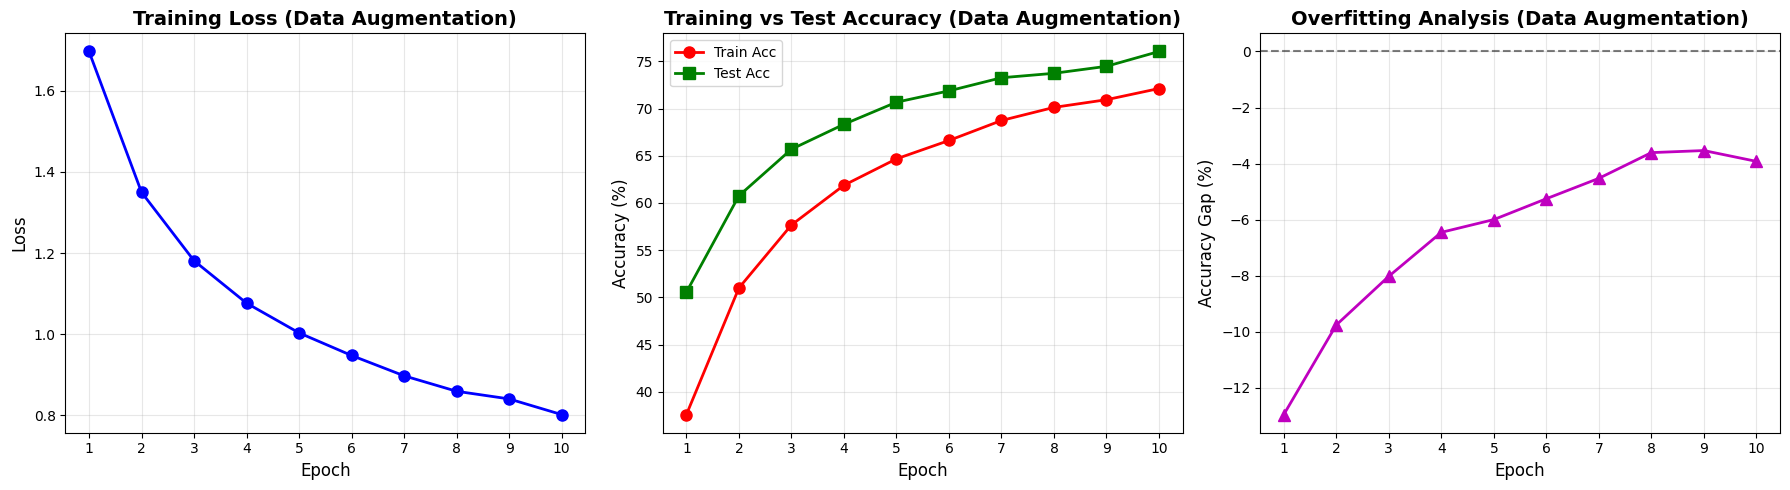


📊 IMPROVEMENT #1: DATA AUGMENTATION - RESULTS SUMMARY
Baseline Test Accuracy: 73.42%
With Data Augmentation: 76.04%
Improvement: 2.62%
✅ Model saved as 'cifar10_data_augmentation.pth'

✅ Experiment #1 completed! Ready for next improvement.


In [ ]:
# ============================================================================
# CIFAR-10 Improvement #1: Data Augmentation
# Baseline Test Accuracy: 73.42%
# ============================================================================

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ============================================================================
# 1. Data Augmentation - Enhanced Transform Pipeline
# ============================================================================

# Training data with augmentation
transform_train_augmented = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),        # Randomly flip images horizontally with 50% probability
    transforms.RandomCrop(32, padding=4),          # Randomly crop 32x32 after padding 4 pixels on each side
    transforms.ColorJitter(                        # Randomly change brightness, contrast, saturation
        brightness=0.2,
        contrast=0.2,
        saturation=0.2
    ),
    transforms.ToTensor(),                         # Convert PIL Image to Tensor
    transforms.Normalize(                          # Normalize with mean and std of CIFAR-10
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2470, 0.2435, 0.2616)
    )
])

# Test data without augmentation (only normalization)
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2470, 0.2435, 0.2616)
    )
])

# Load CIFAR-10 with augmented transforms
print("Loading CIFAR-10 with data augmentation...")
trainset_aug = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform_train_augmented
)

testset_aug = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform_test
)

# Create data loaders
trainloader_aug = DataLoader(trainset_aug, batch_size=128, shuffle=True, num_workers=2)
testloader_aug = DataLoader(testset_aug, batch_size=128, shuffle=False, num_workers=2)

print(f"✅ Data loaded with augmentation!")
print(f"Training samples: {len(trainset_aug)}, Test samples: {len(testset_aug)}")

# ============================================================================
# 2. Visualize the effect of data augmentation
# ============================================================================

def show_augmentation_examples():
    """Display original and augmented images side by side"""
    # Get one image
    original_transform = transforms.Compose([transforms.ToTensor()])
    original_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                                     download=True, transform=original_transform)

    # Get one sample
    img, label = original_dataset[0]

    # Apply augmentation multiple times
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))

    # Show original
    axes[0, 0].imshow(img.permute(1, 2, 0))
    axes[0, 0].set_title('Original')
    axes[0, 0].axis('off')

    # Show augmented versions
    for i in range(1, 8):
        augmented_img, _ = trainset_aug[0]  # Get augmented version
        augmented_img = augmented_img * torch.tensor([0.2470, 0.2435, 0.2616]).view(3, 1, 1) + \
                       torch.tensor([0.4914, 0.4822, 0.4465]).view(3, 1, 1)  # Denormalize
        augmented_img = torch.clamp(augmented_img, 0, 1)

        row, col = i // 4, i % 4
        axes[row, col].imshow(augmented_img.permute(1, 2, 0))
        axes[row, col].set_title(f'Augmented {i}')
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.savefig('data_augmentation_examples.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("✅ Augmentation examples saved!")

show_augmentation_examples()

# ============================================================================
# 3. Use the Same Baseline Model (for fair comparison)
# ============================================================================

class SimpleCNN(nn.Module):
    """
    Baseline CNN architecture - keeping the same for fair comparison
    Only the training data has changed (with augmentation)
    """
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)

        # Dropout for regularization
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Conv + ReLU + Pool layers
        x = self.pool(torch.relu(self.conv1(x)))  # 32x32 -> 16x16
        x = self.pool(torch.relu(self.conv2(x)))  # 16x16 -> 8x8
        x = self.pool(torch.relu(self.conv3(x)))  # 8x8 -> 4x4

        # Flatten
        x = x.view(-1, 128 * 4 * 4)

        # Fully connected layers
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Create model instance
model_aug = SimpleCNN().to(device)
print(f"✅ Model created on {device}")

# Count parameters
total_params = sum(p.numel() for p in model_aug.parameters())
print(f"Total parameters: {total_params:,}")

# ============================================================================
# 4. Training Setup
# ============================================================================

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_aug.parameters(), lr=0.001)

print("✅ Loss function and optimizer configured!")

# ============================================================================
# 5. Training Function
# ============================================================================

def train_model(model, trainloader, testloader, criterion, optimizer, epochs=10, model_name="Model"):
    """
    Train the model and track performance metrics

    Args:
        model: Neural network model
        trainloader: Training data loader
        testloader: Test data loader
        criterion: Loss function
        optimizer: Optimizer
        epochs: Number of training epochs
        model_name: Name for display purposes

    Returns:
        train_losses: List of average training losses per epoch
        train_accs: List of training accuracies per epoch
        test_accs: List of test accuracies per epoch
    """
    model.train()
    train_losses = []
    train_accs = []
    test_accs = []

    print(f"\n{'='*60}")
    print(f"Training {model_name}")
    print(f"{'='*60}\n")

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        for i, (inputs, labels) in enumerate(trainloader):
            # Move data to device (GPU/CPU)
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            # Print progress every 100 batches
            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(trainloader)}], '
                      f'Loss: {loss.item():.4f}, Acc: {100.*correct/total:.2f}%')

        # Calculate epoch metrics
        epoch_loss = running_loss / len(trainloader)
        epoch_acc = 100. * correct / total
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc)

        # Test after each epoch
        test_acc = test_model(model, testloader, verbose=False)
        test_accs.append(test_acc)

        print(f'\n📊 Epoch [{epoch+1}/{epochs}] Summary:')
        print(f'   Train Loss: {epoch_loss:.4f}')
        print(f'   Train Acc: {epoch_acc:.2f}%')
        print(f'   Test Acc: {test_acc:.2f}%')
        print(f'{"-"*60}\n')

    print(f"✅ Training completed for {model_name}!\n")
    return train_losses, train_accs, test_accs

# ============================================================================
# 6. Testing Function
# ============================================================================

def test_model(model, testloader, verbose=True):
    """
    Evaluate model on test set

    Args:
        model: Neural network model
        testloader: Test data loader
        verbose: Whether to print results

    Returns:
        accuracy: Test accuracy percentage
    """
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation for testing
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100. * correct / total

    if verbose:
        print(f'Test Accuracy: {accuracy:.2f}%')

    model.train()  # Switch back to training mode
    return accuracy

# ============================================================================
# 7. Train the Model with Data Augmentation
# ============================================================================

print("🚀 Starting training with Data Augmentation...")
train_losses_aug, train_accs_aug, test_accs_aug = train_model(
    model_aug,
    trainloader_aug,
    testloader_aug,
    criterion,
    optimizer,
    epochs=10,  # Train for more epochs to see the effect
    model_name="SimpleCNN + Data Augmentation"
)

# Final test
final_test_acc = test_model(model_aug, testloader_aug, verbose=True)

# ============================================================================
# 8. Visualization and Comparison
# ============================================================================

def plot_training_results(train_losses, train_accs, test_accs, title_suffix=""):
    """
    Plot training curves: loss and accuracy

    Args:
        train_losses: List of training losses
        train_accs: List of training accuracies
        test_accs: List of test accuracies
        title_suffix: Additional text for plot title
    """
    epochs_list = list(range(1, len(train_losses) + 1))

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Training Loss
    axes[0].plot(epochs_list, train_losses, 'b-o', linewidth=2, markersize=8)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].set_title(f'Training Loss {title_suffix}', fontsize=14, fontweight='bold')
    axes[0].set_xticks(epochs_list)
    axes[0].grid(True, alpha=0.3)

    # Training vs Test Accuracy
    axes[1].plot(epochs_list, train_accs, 'r-o', linewidth=2, markersize=8, label='Train Acc')
    axes[1].plot(epochs_list, test_accs, 'g-s', linewidth=2, markersize=8, label='Test Acc')
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Accuracy (%)', fontsize=12)
    axes[1].set_title(f'Training vs Test Accuracy {title_suffix}', fontsize=14, fontweight='bold')
    axes[1].set_xticks(epochs_list)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    # Overfitting Gap
    gap = [train_accs[i] - test_accs[i] for i in range(len(train_accs))]
    axes[2].plot(epochs_list, gap, 'm-^', linewidth=2, markersize=8)
    axes[2].set_xlabel('Epoch', fontsize=12)
    axes[2].set_ylabel('Accuracy Gap (%)', fontsize=12)
    axes[2].set_title(f'Overfitting Analysis {title_suffix}', fontsize=14, fontweight='bold')
    axes[2].set_xticks(epochs_list)
    axes[2].axhline(y=0, color='k', linestyle='--', alpha=0.5)
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'training_results{title_suffix.replace(" ", "_")}.png', dpi=150, bbox_inches='tight')
    plt.show()

# Plot results
plot_training_results(train_losses_aug, train_accs_aug, test_accs_aug,
                     title_suffix="(Data Augmentation)")

# ============================================================================
# 9. Save Results for Comparison
# ============================================================================

print("\n" + "="*60)
print("📊 IMPROVEMENT #1: DATA AUGMENTATION - RESULTS SUMMARY")
print("="*60)
print(f"Baseline Test Accuracy: 73.42%")
print(f"With Data Augmentation: {final_test_acc:.2f}%")
print(f"Improvement: {final_test_acc - 73.42:.2f}%")
print("="*60)

# Save model
torch.save(model_aug.state_dict(), 'cifar10_data_augmentation.pth')
print("✅ Model saved as 'cifar10_data_augmentation.pth'")

# Save results to dictionary for later comparison
results_exp1 = {
    'name': 'Data Augmentation',
    'test_accuracy': final_test_acc,
    'train_losses': train_losses_aug,
    'train_accs': train_accs_aug,
    'test_accs': test_accs_aug,
    'improvement': final_test_acc - 73.42
}

print("\n✅ Experiment #1 completed! Ready for next improvement.")

Improvement #2: Deeper Network Architecture

Using device: cuda
Loading CIFAR-10 dataset...


100%|██████████| 170M/170M [00:11<00:00, 15.3MB/s]


✅ Data loaded!
Training samples: 50000, Test samples: 10000
✅ Deeper model created on cuda
Total parameters: 12,850,954
Trainable parameters: 12,850,954
✅ Loss function and optimizer configured!
🚀 Starting training with Deeper Network Architecture...

Training Deeper CNN (6 Conv Layers)

Epoch [1/10], Step [100/391], Loss: 1.9025, Acc: 26.23%
Epoch [1/10], Step [200/391], Loss: 1.6454, Acc: 33.46%
Epoch [1/10], Step [300/391], Loss: 1.5875, Acc: 38.32%

📊 Epoch [1/10] Summary:
   Train Loss: 1.5686
   Train Acc: 41.66%
   Test Acc: 50.15%
------------------------------------------------------------

Epoch [2/10], Step [100/391], Loss: 1.2459, Acc: 56.41%
Epoch [2/10], Step [200/391], Loss: 1.0166, Acc: 58.37%
Epoch [2/10], Step [300/391], Loss: 1.0757, Acc: 59.56%

📊 Epoch [2/10] Summary:
   Train Loss: 1.1283
   Train Acc: 60.73%
   Test Acc: 60.46%
------------------------------------------------------------

Epoch [3/10], Step [100/391], Loss: 0.9403, Acc: 67.30%
Epoch [3/10], Step 

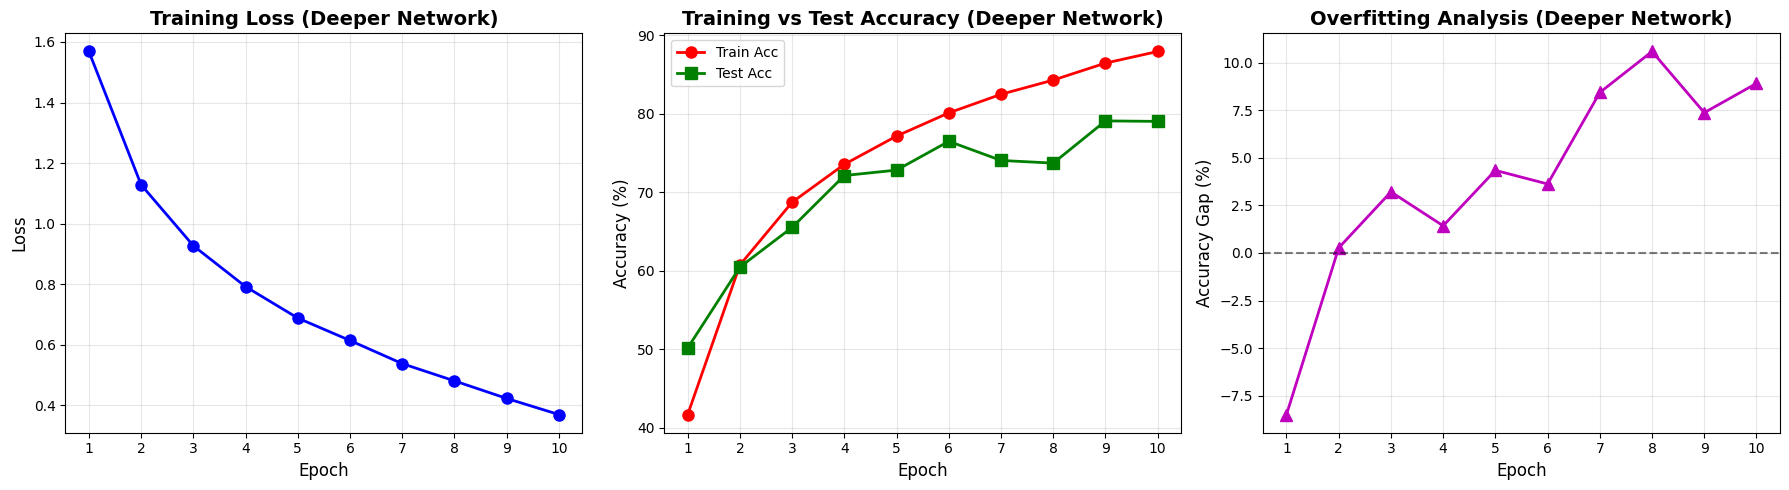


📊 IMPROVEMENT #2: DEEPER NETWORK - RESULTS SUMMARY
Baseline Test Accuracy: 73.42%
With Deeper Network: 79.03%
Improvement: 5.61%
Number of parameters: 12,850,954
✅ Model saved as 'cifar10_deeper_network.pth'

✅ Experiment #2 completed! Ready for next improvement.


In [ ]:
# ============================================================================
# CIFAR-10 Improvement #2: Deeper Network Architecture
# Baseline Test Accuracy: 73.42%
# ============================================================================

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ============================================================================
# 1. Data Preparation (Standard transforms, no augmentation for fair comparison)
# ============================================================================

transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2470, 0.2435, 0.2616)
    )
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2470, 0.2435, 0.2616)
    )
])

# Load CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform_train
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform_test
)

# Create data loaders
trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

print(f"✅ Data loaded!")
print(f"Training samples: {len(trainset)}, Test samples: {len(testset)}")

# ============================================================================
# 2. Deeper CNN Architecture
# ============================================================================

class DeeperCNN(nn.Module):
    """
    Deeper CNN with more convolutional layers

    Architecture improvements:
    - Increased depth from 3 to 6 convolutional layers
    - Gradual channel expansion: 32 -> 64 -> 128 -> 256 -> 512 -> 512
    - Batch normalization after each conv layer for stable training
    - More capacity to learn complex features

    Baseline: 3 conv layers (32, 64, 128 channels)
    Improved: 6 conv layers (32, 64, 128, 256, 512, 512 channels)
    """
    def __init__(self):
        super(DeeperCNN, self).__init__()

        # First block: 3 -> 32 channels
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # Batch normalization for stable training

        # Second block: 32 -> 64 channels
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # Third block: 64 -> 128 channels
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        # Fourth block: 128 -> 256 channels (NEW - deeper network)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)

        # Fifth block: 256 -> 512 channels (NEW - deeper network)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(512)

        # Sixth block: 512 -> 512 channels (NEW - deeper network)
        self.conv6 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(512)

        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers
        # After 3 pooling operations: 32x32 -> 16x16 -> 8x8 -> 4x4
        self.fc1 = nn.Linear(512 * 4 * 4, 1024)  # Larger hidden layer
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)

        # Dropout for regularization
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        """
        Forward pass through the deeper network

        Processing flow:
        1. Conv1 + BN + ReLU + Pool: 32x32x3 -> 16x16x32
        2. Conv2 + BN + ReLU + Pool: 16x16x32 -> 8x8x64
        3. Conv3 + BN + ReLU: 8x8x64 -> 8x8x128
        4. Conv4 + BN + ReLU + Pool: 8x8x128 -> 4x4x256
        5. Conv5 + BN + ReLU: 4x4x256 -> 4x4x512
        6. Conv6 + BN + ReLU: 4x4x512 -> 4x4x512
        7. Flatten and FC layers
        """
        # Block 1: Conv + BN + ReLU + Pool
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))  # 32x32 -> 16x16

        # Block 2: Conv + BN + ReLU + Pool
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))  # 16x16 -> 8x8

        # Block 3: Conv + BN + ReLU (no pool to maintain spatial info)
        x = torch.relu(self.bn3(self.conv3(x)))  # 8x8 -> 8x8

        # Block 4: Conv + BN + ReLU + Pool
        x = self.pool(torch.relu(self.bn4(self.conv4(x))))  # 8x8 -> 4x4

        # Block 5: Conv + BN + ReLU (no pool, already small)
        x = torch.relu(self.bn5(self.conv5(x)))  # 4x4 -> 4x4

        # Block 6: Conv + BN + ReLU (no pool, already small)
        x = torch.relu(self.bn6(self.conv6(x)))  # 4x4 -> 4x4

        # Flatten the feature maps
        x = x.view(-1, 512 * 4 * 4)

        # Fully connected layers with dropout
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        return x

# Create model instance
model_deeper = DeeperCNN().to(device)
print(f"✅ Deeper model created on {device}")

# Count parameters
total_params = sum(p.numel() for p in model_deeper.parameters())
trainable_params = sum(p.numel() for p in model_deeper.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# ============================================================================
# 3. Training Setup
# ============================================================================

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_deeper.parameters(), lr=0.001, weight_decay=1e-4)  # Add L2 regularization

print("✅ Loss function and optimizer configured!")

# ============================================================================
# 4. Training Function
# ============================================================================

def train_model(model, trainloader, testloader, criterion, optimizer, epochs=10, model_name="Model"):
    """
    Train the model and track performance metrics

    Args:
        model: Neural network model
        trainloader: Training data loader
        testloader: Test data loader
        criterion: Loss function
        optimizer: Optimizer
        epochs: Number of training epochs
        model_name: Name for display purposes

    Returns:
        train_losses: List of average training losses per epoch
        train_accs: List of training accuracies per epoch
        test_accs: List of test accuracies per epoch
    """
    model.train()
    train_losses = []
    train_accs = []
    test_accs = []

    print(f"\n{'='*60}")
    print(f"Training {model_name}")
    print(f"{'='*60}\n")

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        for i, (inputs, labels) in enumerate(trainloader):
            # Move data to device (GPU/CPU)
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            # Print progress every 100 batches
            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(trainloader)}], '
                      f'Loss: {loss.item():.4f}, Acc: {100.*correct/total:.2f}%')

        # Calculate epoch metrics
        epoch_loss = running_loss / len(trainloader)
        epoch_acc = 100. * correct / total
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc)

        # Test after each epoch
        test_acc = test_model(model, testloader, verbose=False)
        test_accs.append(test_acc)

        print(f'\n📊 Epoch [{epoch+1}/{epochs}] Summary:')
        print(f'   Train Loss: {epoch_loss:.4f}')
        print(f'   Train Acc: {epoch_acc:.2f}%')
        print(f'   Test Acc: {test_acc:.2f}%')
        print(f'{"-"*60}\n')

    print(f"✅ Training completed for {model_name}!\n")
    return train_losses, train_accs, test_accs

# ============================================================================
# 5. Testing Function
# ============================================================================

def test_model(model, testloader, verbose=True):
    """
    Evaluate model on test set

    Args:
        model: Neural network model
        testloader: Test data loader
        verbose: Whether to print results

    Returns:
        accuracy: Test accuracy percentage
    """
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation for testing
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100. * correct / total

    if verbose:
        print(f'Test Accuracy: {accuracy:.2f}%')

    model.train()  # Switch back to training mode
    return accuracy

# ============================================================================
# 6. Train the Deeper Model
# ============================================================================

print("🚀 Starting training with Deeper Network Architecture...")
train_losses_deeper, train_accs_deeper, test_accs_deeper = train_model(
    model_deeper,
    trainloader,
    testloader,
    criterion,
    optimizer,
    epochs=10,
    model_name="Deeper CNN (6 Conv Layers)"
)

# Final test
final_test_acc = test_model(model_deeper, testloader, verbose=True)

# ============================================================================
# 7. Visualization
# ============================================================================

def plot_training_results(train_losses, train_accs, test_accs, title_suffix=""):
    """
    Plot training curves: loss and accuracy

    Args:
        train_losses: List of training losses
        train_accs: List of training accuracies
        test_accs: List of test accuracies
        title_suffix: Additional text for plot title
    """
    epochs_list = list(range(1, len(train_losses) + 1))

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Training Loss
    axes[0].plot(epochs_list, train_losses, 'b-o', linewidth=2, markersize=8)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].set_title(f'Training Loss {title_suffix}', fontsize=14, fontweight='bold')
    axes[0].set_xticks(epochs_list)
    axes[0].grid(True, alpha=0.3)

    # Training vs Test Accuracy
    axes[1].plot(epochs_list, train_accs, 'r-o', linewidth=2, markersize=8, label='Train Acc')
    axes[1].plot(epochs_list, test_accs, 'g-s', linewidth=2, markersize=8, label='Test Acc')
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Accuracy (%)', fontsize=12)
    axes[1].set_title(f'Training vs Test Accuracy {title_suffix}', fontsize=14, fontweight='bold')
    axes[1].set_xticks(epochs_list)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    # Overfitting Gap
    gap = [train_accs[i] - test_accs[i] for i in range(len(train_accs))]
    axes[2].plot(epochs_list, gap, 'm-^', linewidth=2, markersize=8)
    axes[2].set_xlabel('Epoch', fontsize=12)
    axes[2].set_ylabel('Accuracy Gap (%)', fontsize=12)
    axes[2].set_title(f'Overfitting Analysis {title_suffix}', fontsize=14, fontweight='bold')
    axes[2].set_xticks(epochs_list)
    axes[2].axhline(y=0, color='k', linestyle='--', alpha=0.5)
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'training_results{title_suffix.replace(" ", "_")}.png', dpi=150, bbox_inches='tight')
    plt.show()

# Plot results
plot_training_results(train_losses_deeper, train_accs_deeper, test_accs_deeper,
                     title_suffix="(Deeper Network)")

# ============================================================================
# 8. Save Results
# ============================================================================

print("\n" + "="*60)
print("📊 IMPROVEMENT #2: DEEPER NETWORK - RESULTS SUMMARY")
print("="*60)
print(f"Baseline Test Accuracy: 73.42%")
print(f"With Deeper Network: {final_test_acc:.2f}%")
print(f"Improvement: {final_test_acc - 73.42:.2f}%")
print(f"Number of parameters: {total_params:,}")
print("="*60)

# Save model
torch.save(model_deeper.state_dict(), 'cifar10_deeper_network.pth')
print("✅ Model saved as 'cifar10_deeper_network.pth'")

# Save results to dictionary for later comparison
results_exp2 = {
    'name': 'Deeper Network',
    'test_accuracy': final_test_acc,
    'train_losses': train_losses_deeper,
    'train_accs': train_accs_deeper,
    'test_accs': test_accs_deeper,
    'improvement': final_test_acc - 73.42,
    'parameters': total_params
}

print("\n✅ Experiment #2 completed! Ready for next improvement.")

Improvement #3: Residual Connections

Using device: cuda
Loading CIFAR-10 dataset...


100%|██████████| 170M/170M [00:03<00:00, 48.2MB/s]


✅ Data loaded!
Training samples: 50000, Test samples: 10000
✅ ResNet-style model created on cuda
Total parameters: 2,777,674
Trainable parameters: 2,777,674
✅ Loss function and optimizer configured!
🚀 Starting training with Residual Connections...

Training ResNet-style CNN with Skip Connections

Epoch [1/10], Step [100/391], Loss: 1.4720, Acc: 37.57%
Epoch [1/10], Step [200/391], Loss: 1.2122, Acc: 44.13%
Epoch [1/10], Step [300/391], Loss: 0.9839, Acc: 49.10%

📊 Epoch [1/10] Summary:
   Train Loss: 1.2992
   Train Acc: 52.70%
   Test Acc: 61.71%
------------------------------------------------------------

Epoch [2/10], Step [100/391], Loss: 0.9895, Acc: 67.13%
Epoch [2/10], Step [200/391], Loss: 0.6798, Acc: 68.81%
Epoch [2/10], Step [300/391], Loss: 0.6215, Acc: 70.04%

📊 Epoch [2/10] Summary:
   Train Loss: 0.8218
   Train Acc: 70.90%
   Test Acc: 62.70%
------------------------------------------------------------

Epoch [3/10], Step [100/391], Loss: 0.6285, Acc: 77.16%
Epoch [3/1

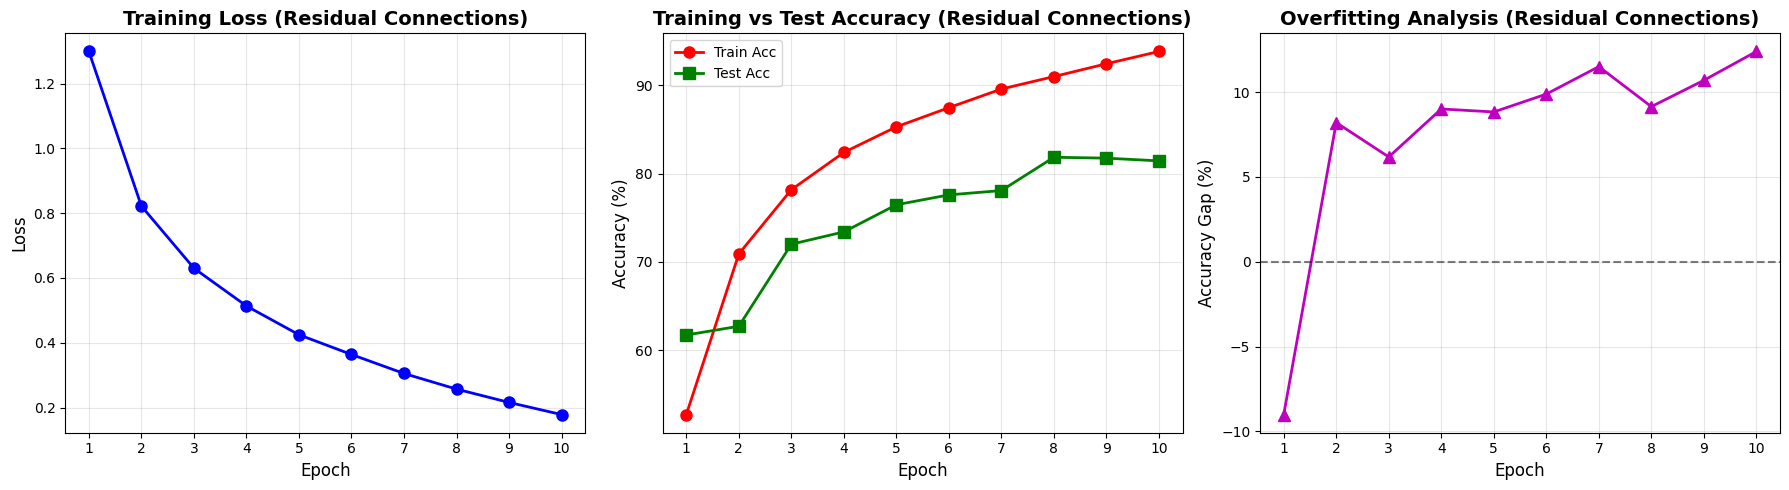


📊 IMPROVEMENT #3: RESIDUAL CONNECTIONS - RESULTS SUMMARY
Baseline Test Accuracy: 73.42%
With Residual Connections: 81.43%
Improvement: 8.01%
Number of parameters: 2,777,674
✅ Model saved as 'cifar10_residual_connections.pth'

✅ Experiment #3 completed! Ready for next improvement.


In [ ]:
# ============================================================================
# CIFAR-10 Improvement #3: Residual Connections (Skip Connections)
# Baseline Test Accuracy: 73.42%
# ============================================================================

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ============================================================================
# 1. Data Preparation
# ============================================================================

transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2470, 0.2435, 0.2616)
    )
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2470, 0.2435, 0.2616)
    )
])

# Load CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform_train
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform_test
)

# Create data loaders
trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

print(f"✅ Data loaded!")
print(f"Training samples: {len(trainset)}, Test samples: {len(testset)}")

# ============================================================================
# 2. Residual Block Implementation
# ============================================================================

class ResidualBlock(nn.Module):
    """
    Residual Block with skip connection

    Key innovation: Identity mapping (skip connection)
    - Allows gradients to flow directly through the network
    - Helps training deeper networks by avoiding vanishing gradients
    - Formula: output = F(x) + x, where F(x) is the residual function

    If input and output dimensions differ, use a 1x1 convolution to match them
    """
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()

        # Main path: two 3x3 convolutions
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Skip connection: identity or 1x1 conv to match dimensions
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            # Use 1x1 convolution to match dimensions when needed
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1,
                         stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        """
        Forward pass with residual connection

        Flow: x -> conv1 -> bn1 -> relu -> conv2 -> bn2 -> (+) -> relu
                                                             ↑
                                                          shortcut(x)
        """
        # Main path
        out = torch.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))

        # Add skip connection
        out += self.shortcut(x)
        out = torch.relu(out)

        return out

# ============================================================================
# 3. ResNet-style CNN with Residual Connections
# ============================================================================

class ResNetCNN(nn.Module):
    """
    ResNet-style CNN with residual blocks

    Architecture:
    - Initial conv layer: 3 -> 64 channels
    - 3 stages with residual blocks:
      * Stage 1: 64 channels (2 blocks)
      * Stage 2: 128 channels (2 blocks) with stride=2 for downsampling
      * Stage 3: 256 channels (2 blocks) with stride=2 for downsampling
    - Global average pooling
    - Fully connected layer for classification

    Benefits of residual connections:
    1. Easier to train deeper networks
    2. Better gradient flow (solves vanishing gradient problem)
    3. Enables learning identity mappings when needed
    4. Improved feature reuse across layers
    """
    def __init__(self, num_classes=10):
        super(ResNetCNN, self).__init__()

        # Initial convolution layer
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)

        # Residual stages
        # Stage 1: 64 channels, no downsampling (32x32 -> 32x32)
        self.layer1 = self._make_layer(64, 64, num_blocks=2, stride=1)

        # Stage 2: 128 channels, downsampling (32x32 -> 16x16)
        self.layer2 = self._make_layer(64, 128, num_blocks=2, stride=2)

        # Stage 3: 256 channels, downsampling (16x16 -> 8x8)
        self.layer3 = self._make_layer(128, 256, num_blocks=2, stride=2)

        # Global average pooling (8x8 -> 1x1)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Fully connected layer
        self.fc = nn.Linear(256, num_classes)

    def _make_layer(self, in_channels, out_channels, num_blocks, stride):
        """
        Create a stage with multiple residual blocks

        Args:
            in_channels: Input channel dimension
            out_channels: Output channel dimension
            num_blocks: Number of residual blocks in this stage
            stride: Stride for the first block (for downsampling)

        Returns:
            Sequential container of residual blocks
        """
        layers = []

        # First block may have stride != 1 for downsampling
        layers.append(ResidualBlock(in_channels, out_channels, stride))

        # Remaining blocks have stride = 1
        for _ in range(1, num_blocks):
            layers.append(ResidualBlock(out_channels, out_channels, stride=1))

        return nn.Sequential(*layers)

    def forward(self, x):
        """
        Forward pass through ResNet-style network

        Flow:
        1. Initial conv: 32x32x3 -> 32x32x64
        2. Stage 1: 32x32x64 -> 32x32x64 (2 residual blocks)
        3. Stage 2: 32x32x64 -> 16x16x128 (2 residual blocks, downsampling)
        4. Stage 3: 16x16x128 -> 8x8x256 (2 residual blocks, downsampling)
        5. Global avg pool: 8x8x256 -> 1x1x256
        6. FC layer: 256 -> 10 classes
        """
        # Initial convolution
        x = torch.relu(self.bn1(self.conv1(x)))

        # Residual stages
        x = self.layer1(x)  # 32x32x64
        x = self.layer2(x)  # 16x16x128
        x = self.layer3(x)  # 8x8x256

        # Global average pooling
        x = self.avg_pool(x)  # 1x1x256
        x = x.view(x.size(0), -1)  # Flatten

        # Classification
        x = self.fc(x)

        return x

# Create model instance
model_resnet = ResNetCNN(num_classes=10).to(device)
print(f"✅ ResNet-style model created on {device}")

# Count parameters
total_params = sum(p.numel() for p in model_resnet.parameters())
trainable_params = sum(p.numel() for p in model_resnet.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# ============================================================================
# 4. Training Setup
# ============================================================================

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnet.parameters(), lr=0.001, weight_decay=1e-4)

print("✅ Loss function and optimizer configured!")

# ============================================================================
# 5. Training Function
# ============================================================================

def train_model(model, trainloader, testloader, criterion, optimizer, epochs=10, model_name="Model"):
    """
    Train the model and track performance metrics

    Args:
        model: Neural network model
        trainloader: Training data loader
        testloader: Test data loader
        criterion: Loss function
        optimizer: Optimizer
        epochs: Number of training epochs
        model_name: Name for display purposes

    Returns:
        train_losses: List of average training losses per epoch
        train_accs: List of training accuracies per epoch
        test_accs: List of test accuracies per epoch
    """
    model.train()
    train_losses = []
    train_accs = []
    test_accs = []

    print(f"\n{'='*60}")
    print(f"Training {model_name}")
    print(f"{'='*60}\n")

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        for i, (inputs, labels) in enumerate(trainloader):
            # Move data to device (GPU/CPU)
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            # Print progress every 100 batches
            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(trainloader)}], '
                      f'Loss: {loss.item():.4f}, Acc: {100.*correct/total:.2f}%')

        # Calculate epoch metrics
        epoch_loss = running_loss / len(trainloader)
        epoch_acc = 100. * correct / total
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc)

        # Test after each epoch
        test_acc = test_model(model, testloader, verbose=False)
        test_accs.append(test_acc)

        print(f'\n📊 Epoch [{epoch+1}/{epochs}] Summary:')
        print(f'   Train Loss: {epoch_loss:.4f}')
        print(f'   Train Acc: {epoch_acc:.2f}%')
        print(f'   Test Acc: {test_acc:.2f}%')
        print(f'{"-"*60}\n')

    print(f"✅ Training completed for {model_name}!\n")
    return train_losses, train_accs, test_accs

# ============================================================================
# 6. Testing Function
# ============================================================================

def test_model(model, testloader, verbose=True):
    """
    Evaluate model on test set

    Args:
        model: Neural network model
        testloader: Test data loader
        verbose: Whether to print results

    Returns:
        accuracy: Test accuracy percentage
    """
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation for testing
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100. * correct / total

    if verbose:
        print(f'Test Accuracy: {accuracy:.2f}%')

    model.train()  # Switch back to training mode
    return accuracy

# ============================================================================
# 7. Train the ResNet Model
# ============================================================================

print("🚀 Starting training with Residual Connections...")
train_losses_resnet, train_accs_resnet, test_accs_resnet = train_model(
    model_resnet,
    trainloader,
    testloader,
    criterion,
    optimizer,
    epochs=10,
    model_name="ResNet-style CNN with Skip Connections"
)

# Final test
final_test_acc = test_model(model_resnet, testloader, verbose=True)

# ============================================================================
# 8. Visualization
# ============================================================================

def plot_training_results(train_losses, train_accs, test_accs, title_suffix=""):
    """
    Plot training curves: loss and accuracy

    Args:
        train_losses: List of training losses
        train_accs: List of training accuracies
        test_accs: List of test accuracies
        title_suffix: Additional text for plot title
    """
    epochs_list = list(range(1, len(train_losses) + 1))

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Training Loss
    axes[0].plot(epochs_list, train_losses, 'b-o', linewidth=2, markersize=8)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].set_title(f'Training Loss {title_suffix}', fontsize=14, fontweight='bold')
    axes[0].set_xticks(epochs_list)
    axes[0].grid(True, alpha=0.3)

    # Training vs Test Accuracy
    axes[1].plot(epochs_list, train_accs, 'r-o', linewidth=2, markersize=8, label='Train Acc')
    axes[1].plot(epochs_list, test_accs, 'g-s', linewidth=2, markersize=8, label='Test Acc')
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Accuracy (%)', fontsize=12)
    axes[1].set_title(f'Training vs Test Accuracy {title_suffix}', fontsize=14, fontweight='bold')
    axes[1].set_xticks(epochs_list)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    # Overfitting Gap
    gap = [train_accs[i] - test_accs[i] for i in range(len(train_accs))]
    axes[2].plot(epochs_list, gap, 'm-^', linewidth=2, markersize=8)
    axes[2].set_xlabel('Epoch', fontsize=12)
    axes[2].set_ylabel('Accuracy Gap (%)', fontsize=12)
    axes[2].set_title(f'Overfitting Analysis {title_suffix}', fontsize=14, fontweight='bold')
    axes[2].set_xticks(epochs_list)
    axes[2].axhline(y=0, color='k', linestyle='--', alpha=0.5)
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'training_results{title_suffix.replace(" ", "_")}.png', dpi=150, bbox_inches='tight')
    plt.show()

# Plot results
plot_training_results(train_losses_resnet, train_accs_resnet, test_accs_resnet,
                     title_suffix="(Residual Connections)")

# ============================================================================
# 9. Save Results
# ============================================================================

print("\n" + "="*60)
print("📊 IMPROVEMENT #3: RESIDUAL CONNECTIONS - RESULTS SUMMARY")
print("="*60)
print(f"Baseline Test Accuracy: 73.42%")
print(f"With Residual Connections: {final_test_acc:.2f}%")
print(f"Improvement: {final_test_acc - 73.42:.2f}%")
print(f"Number of parameters: {total_params:,}")
print("="*60)

# Save model
torch.save(model_resnet.state_dict(), 'cifar10_residual_connections.pth')
print("✅ Model saved as 'cifar10_residual_connections.pth'")

# Save results to dictionary for later comparison
results_exp3 = {
    'name': 'Residual Connections',
    'test_accuracy': final_test_acc,
    'train_losses': train_losses_resnet,
    'train_accs': train_accs_resnet,
    'test_accs': test_accs_resnet,
    'improvement': final_test_acc - 73.42,
    'parameters': total_params
}

print("\n✅ Experiment #3 completed! Ready for next improvement.")

Improvement #4: Advanced Optimizer (AdamW + Cosine Annealing)

Using device: cuda
Loading CIFAR-10 dataset...


100%|██████████| 170M/170M [00:21<00:00, 7.89MB/s]


✅ Data loaded!
Training samples: 50000, Test samples: 10000
✅ Model created on cuda
Total parameters: 620,362
✅ AdamW optimizer with Cosine Annealing LR scheduler configured!
Initial LR: 0.001


/usr/local/lib/python3.12/dist-packages/torch/optim/lr_scheduler.py:192: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


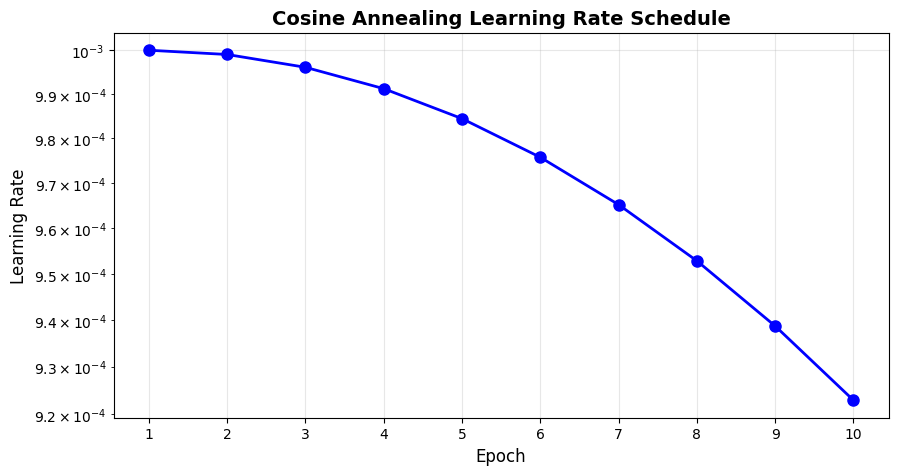

✅ Learning rate schedule visualization saved!
🚀 Starting training with AdamW + Cosine Annealing LR...

Training SimpleCNN + AdamW + Cosine Annealing

Epoch [1/10], Step [100/391], Loss: 1.5197, Acc: 30.84%, LR: 0.001000
Epoch [1/10], Step [200/391], Loss: 1.4103, Acc: 37.77%, LR: 0.001000
Epoch [1/10], Step [300/391], Loss: 1.3963, Acc: 41.64%, LR: 0.001000

📊 Epoch [1/10] Summary:
   Learning Rate: 0.001000
   Train Loss: 1.5206
   Train Acc: 44.33%
   Test Acc: 57.69%
------------------------------------------------------------

Epoch [2/10], Step [100/391], Loss: 1.1756, Acc: 56.86%, LR: 0.000979
Epoch [2/10], Step [200/391], Loss: 1.0817, Acc: 58.14%, LR: 0.000979
Epoch [2/10], Step [300/391], Loss: 1.0609, Acc: 59.18%, LR: 0.000979

📊 Epoch [2/10] Summary:
   Learning Rate: 0.000979
   Train Loss: 1.1205
   Train Acc: 60.04%
   Test Acc: 66.62%
------------------------------------------------------------

Epoch [3/10], Step [100/391], Loss: 0.9180, Acc: 66.87%, LR: 0.000956
Epoch 

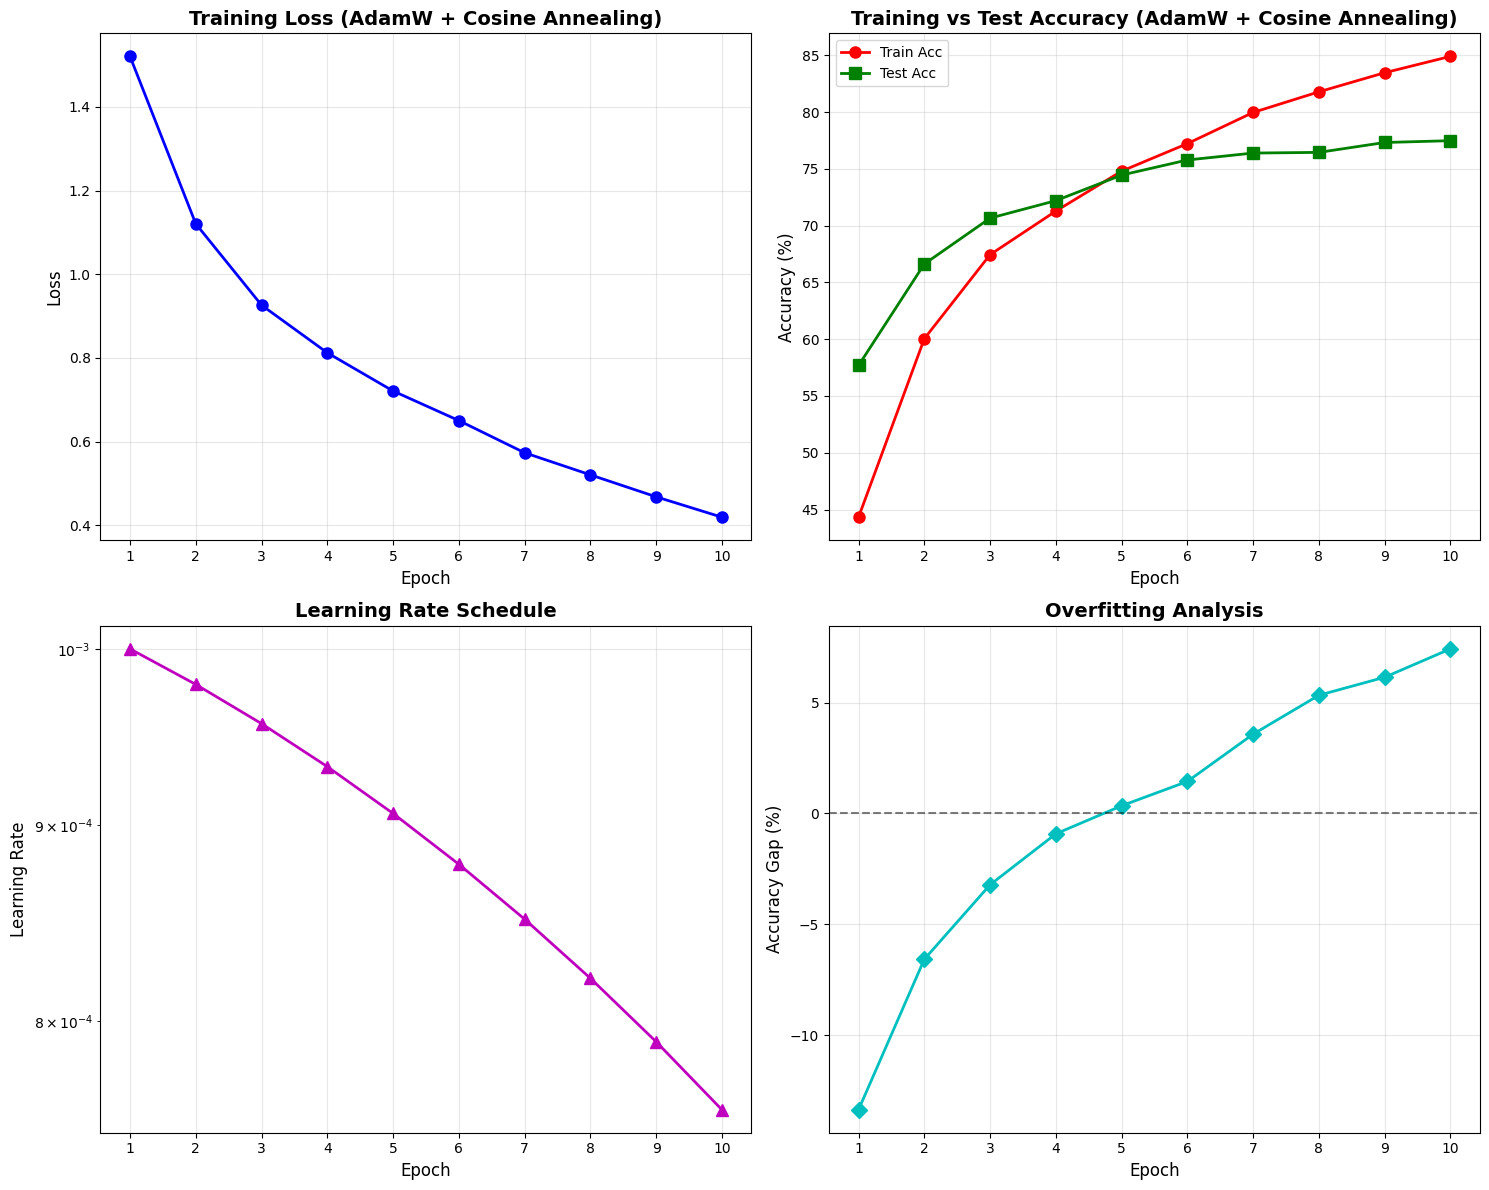


📊 IMPROVEMENT #4: ADVANCED OPTIMIZER - RESULTS SUMMARY
Baseline Test Accuracy: 73.42%
With AdamW + Cosine Annealing: 77.48%
Improvement: 4.06%

Optimizer Configuration:
  - Optimizer: AdamW
  - Initial LR: 0.001
  - Min LR: 1e-6
  - Weight Decay: 5e-4
  - LR Schedule: Cosine Annealing
✅ Model saved as 'cifar10_adamw_cosine.pth'

✅ Experiment #4 completed! Ready for next improvement.


In [ ]:
# ============================================================================
# CIFAR-10 Improvement #4: Advanced Optimizer (AdamW + Cosine Annealing LR)
# Baseline Test Accuracy: 73.42%
# ============================================================================

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import CosineAnnealingLR

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ============================================================================
# 1. Data Preparation
# ============================================================================

transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2470, 0.2435, 0.2616)
    )
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2470, 0.2435, 0.2616)
    )
])

# Load CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform_train
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform_test
)

# Create data loaders
trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

print(f"✅ Data loaded!")
print(f"Training samples: {len(trainset)}, Test samples: {len(testset)}")

# ============================================================================
# 2. Use Same Baseline Model (for fair comparison)
# ============================================================================

class SimpleCNN(nn.Module):
    """
    Baseline CNN architecture - keeping the same for fair comparison
    Only the optimizer and learning rate schedule have changed
    """
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)

        # Dropout for regularization
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Conv + ReLU + Pool layers
        x = self.pool(torch.relu(self.conv1(x)))  # 32x32 -> 16x16
        x = self.pool(torch.relu(self.conv2(x)))  # 16x16 -> 8x8
        x = self.pool(torch.relu(self.conv3(x)))  # 8x8 -> 4x4

        # Flatten
        x = x.view(-1, 128 * 4 * 4)

        # Fully connected layers
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Create model instance
model_adamw = SimpleCNN().to(device)
print(f"✅ Model created on {device}")

# Count parameters
total_params = sum(p.numel() for p in model_adamw.parameters())
print(f"Total parameters: {total_params:,}")

# ============================================================================
# 3. Advanced Optimizer Setup: AdamW + Cosine Annealing
# ============================================================================

"""
Optimizer Improvements:

1. AdamW (Adam with Weight Decay):
   - Decouples weight decay from gradient-based optimization
   - Better generalization than Adam with L2 regularization
   - Fixes the issue of weight decay in Adam optimizer
   - More effective regularization technique

2. Cosine Annealing Learning Rate Scheduler:
   - Smoothly decreases learning rate following cosine curve
   - Helps model converge to better minima
   - Formula: lr = lr_min + (lr_max - lr_min) * (1 + cos(π * epoch / T_max)) / 2
   - Allows model to escape local minima early, then fine-tune later

Benefits:
- Better optimization trajectory
- Improved generalization
- Reduced overfitting
- Smoother convergence
"""

criterion = nn.CrossEntropyLoss()

# AdamW optimizer with weight decay
optimizer_adamw = optim.AdamW(
    model_adamw.parameters(),
    lr=0.001,                # Initial learning rate
    weight_decay=5e-4,       # Weight decay for regularization (decoupled from gradients)
    betas=(0.9, 0.999),      # Exponential decay rates for moment estimates
    eps=1e-8                 # Term added for numerical stability
)

# Cosine Annealing Learning Rate Scheduler
scheduler = CosineAnnealingLR(
    optimizer_adamw,
    T_max=50,                # Maximum number of epochs
    eta_min=1e-5             # Minimum learning rate
)

print("✅ AdamW optimizer with Cosine Annealing LR scheduler configured!")
print(f"Initial LR: {optimizer_adamw.param_groups[0]['lr']}")

# ============================================================================
# 4. Visualize Learning Rate Schedule
# ============================================================================

def visualize_lr_schedule(optimizer, scheduler, epochs):
    """
    Visualize how learning rate changes over epochs

    Args:
        optimizer: Optimizer
        scheduler: Learning rate scheduler
        epochs: Number of epochs
    """
    lrs = []

    # Simulate lr changes
    for epoch in range(epochs):
        lrs.append(optimizer.param_groups[0]['lr'])
        scheduler.step()

    # Reset scheduler
    optimizer.param_groups[0]['lr'] = 0.001
    scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=1e-6)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs + 1), lrs, 'b-o', linewidth=2, markersize=8)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Learning Rate', fontsize=12)
    plt.title('Cosine Annealing Learning Rate Schedule', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.xticks(range(1, epochs + 1))
    plt.yscale('log')  # Log scale to see the decay clearly
    plt.savefig('lr_schedule_cosine_annealing.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("✅ Learning rate schedule visualization saved!")

visualize_lr_schedule(optimizer_adamw, scheduler, epochs=10)

# ============================================================================
# 5. Training Function with LR Scheduler
# ============================================================================

def train_model_with_scheduler(model, trainloader, testloader, criterion, optimizer,
                                scheduler, epochs=10, model_name="Model"):
    """
    Train the model with learning rate scheduling

    Args:
        model: Neural network model
        trainloader: Training data loader
        testloader: Test data loader
        criterion: Loss function
        optimizer: Optimizer
        scheduler: Learning rate scheduler
        epochs: Number of training epochs
        model_name: Name for display purposes

    Returns:
        train_losses: List of average training losses per epoch
        train_accs: List of training accuracies per epoch
        test_accs: List of test accuracies per epoch
        learning_rates: List of learning rates per epoch
    """
    model.train()
    train_losses = []
    train_accs = []
    test_accs = []
    learning_rates = []

    print(f"\n{'='*60}")
    print(f"Training {model_name}")
    print(f"{'='*60}\n")

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        # Record current learning rate
        current_lr = optimizer.param_groups[0]['lr']
        learning_rates.append(current_lr)

        # Training loop
        for i, (inputs, labels) in enumerate(trainloader):
            # Move data to device (GPU/CPU)
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            # Print progress every 100 batches
            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(trainloader)}], '
                      f'Loss: {loss.item():.4f}, Acc: {100.*correct/total:.2f}%, LR: {current_lr:.6f}')

        # Calculate epoch metrics
        epoch_loss = running_loss / len(trainloader)
        epoch_acc = 100. * correct / total
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc)

        # Test after each epoch
        test_acc = test_model(model, testloader, verbose=False)
        test_accs.append(test_acc)

        # Step the learning rate scheduler
        scheduler.step()

        print(f'\n📊 Epoch [{epoch+1}/{epochs}] Summary:')
        print(f'   Learning Rate: {current_lr:.6f}')
        print(f'   Train Loss: {epoch_loss:.4f}')
        print(f'   Train Acc: {epoch_acc:.2f}%')
        print(f'   Test Acc: {test_acc:.2f}%')
        print(f'{"-"*60}\n')

    print(f"✅ Training completed for {model_name}!\n")
    return train_losses, train_accs, test_accs, learning_rates

# ============================================================================
# 6. Testing Function
# ============================================================================

def test_model(model, testloader, verbose=True):
    """
    Evaluate model on test set

    Args:
        model: Neural network model
        testloader: Test data loader
        verbose: Whether to print results

    Returns:
        accuracy: Test accuracy percentage
    """
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation for testing
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100. * correct / total

    if verbose:
        print(f'Test Accuracy: {accuracy:.2f}%')

    model.train()  # Switch back to training mode
    return accuracy

# ============================================================================
# 7. Train the Model with AdamW + Cosine Annealing
# ============================================================================

print("🚀 Starting training with AdamW + Cosine Annealing LR...")
train_losses_adamw, train_accs_adamw, test_accs_adamw, lrs = train_model_with_scheduler(
    model_adamw,
    trainloader,
    testloader,
    criterion,
    optimizer_adamw,
    scheduler,
    epochs=10,
    model_name="SimpleCNN + AdamW + Cosine Annealing"
)

# Final test
final_test_acc = test_model(model_adamw, testloader, verbose=True)

# ============================================================================
# 8. Visualization
# ============================================================================

def plot_training_results_with_lr(train_losses, train_accs, test_accs, lrs, title_suffix=""):
    """
    Plot training curves including learning rate schedule

    Args:
        train_losses: List of training losses
        train_accs: List of training accuracies
        test_accs: List of test accuracies
        lrs: List of learning rates
        title_suffix: Additional text for plot title
    """
    epochs_list = list(range(1, len(train_losses) + 1))

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Training Loss
    axes[0, 0].plot(epochs_list, train_losses, 'b-o', linewidth=2, markersize=8)
    axes[0, 0].set_xlabel('Epoch', fontsize=12)
    axes[0, 0].set_ylabel('Loss', fontsize=12)
    axes[0, 0].set_title(f'Training Loss {title_suffix}', fontsize=14, fontweight='bold')
    axes[0, 0].set_xticks(epochs_list)
    axes[0, 0].grid(True, alpha=0.3)

    # Training vs Test Accuracy
    axes[0, 1].plot(epochs_list, train_accs, 'r-o', linewidth=2, markersize=8, label='Train Acc')
    axes[0, 1].plot(epochs_list, test_accs, 'g-s', linewidth=2, markersize=8, label='Test Acc')
    axes[0, 1].set_xlabel('Epoch', fontsize=12)
    axes[0, 1].set_ylabel('Accuracy (%)', fontsize=12)
    axes[0, 1].set_title(f'Training vs Test Accuracy {title_suffix}', fontsize=14, fontweight='bold')
    axes[0, 1].set_xticks(epochs_list)
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Learning Rate Schedule
    axes[1, 0].plot(epochs_list, lrs, 'm-^', linewidth=2, markersize=8)
    axes[1, 0].set_xlabel('Epoch', fontsize=12)
    axes[1, 0].set_ylabel('Learning Rate', fontsize=12)
    axes[1, 0].set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
    axes[1, 0].set_xticks(epochs_list)
    axes[1, 0].set_yscale('log')
    axes[1, 0].grid(True, alpha=0.3)

    # Overfitting Gap
    gap = [train_accs[i] - test_accs[i] for i in range(len(train_accs))]
    axes[1, 1].plot(epochs_list, gap, 'c-D', linewidth=2, markersize=8)
    axes[1, 1].set_xlabel('Epoch', fontsize=12)
    axes[1, 1].set_ylabel('Accuracy Gap (%)', fontsize=12)
    axes[1, 1].set_title('Overfitting Analysis', fontsize=14, fontweight='bold')
    axes[1, 1].set_xticks(epochs_list)
    axes[1, 1].axhline(y=0, color='k', linestyle='--', alpha=0.5)
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'training_results{title_suffix.replace(" ", "_")}.png', dpi=150, bbox_inches='tight')
    plt.show()

# Plot results
plot_training_results_with_lr(train_losses_adamw, train_accs_adamw, test_accs_adamw, lrs,
                              title_suffix="(AdamW + Cosine Annealing)")

# ============================================================================
# 9. Save Results
# ============================================================================

print("\n" + "="*60)
print("📊 IMPROVEMENT #4: ADVANCED OPTIMIZER - RESULTS SUMMARY")
print("="*60)
print(f"Baseline Test Accuracy: 73.42%")
print(f"With AdamW + Cosine Annealing: {final_test_acc:.2f}%")
print(f"Improvement: {final_test_acc - 73.42:.2f}%")
print(f"\nOptimizer Configuration:")
print(f"  - Optimizer: AdamW")
print(f"  - Initial LR: 0.001")
print(f"  - Min LR: 1e-6")
print(f"  - Weight Decay: 5e-4")
print(f"  - LR Schedule: Cosine Annealing")
print("="*60)

# Save model
torch.save(model_adamw.state_dict(), 'cifar10_adamw_cosine.pth')
print("✅ Model saved as 'cifar10_adamw_cosine.pth'")

# Save results to dictionary for later comparison
results_exp4 = {
    'name': 'AdamW + Cosine Annealing',
    'test_accuracy': final_test_acc,
    'train_losses': train_losses_adamw,
    'train_accs': train_accs_adamw,
    'test_accs': test_accs_adamw,
    'improvement': final_test_acc - 73.42,
    'learning_rates': lrs
}

print("\n✅ Experiment #4 completed! Ready for next improvement.")

Improvement #5: Attention Mechanism (Self-Attention Layer)

Using device: cuda
Loading CIFAR-10 dataset...
✅ Data loaded!
Training samples: 50000, Test samples: 10000
✅ Attention-enhanced model created on cuda
Total parameters: 647,973
Trainable parameters: 647,973
✅ Loss function and optimizer configured!
🚀 Starting training with Self-Attention Mechanism...

Training CNN with Self-Attention

Epoch [1/10], Step [100/391], Loss: 1.3625, Acc: 37.30%
Epoch [1/10], Step [200/391], Loss: 1.3145, Acc: 44.55%
Epoch [1/10], Step [300/391], Loss: 1.2896, Acc: 49.09%

📊 Epoch [1/10] Summary:
   Train Loss: 1.3356
   Train Acc: 51.81%
   Test Acc: 66.15%
------------------------------------------------------------

Epoch [2/10], Step [100/391], Loss: 1.0181, Acc: 65.11%
Epoch [2/10], Step [200/391], Loss: 0.8583, Acc: 66.37%
Epoch [2/10], Step [300/391], Loss: 0.7522, Acc: 67.15%

📊 Epoch [2/10] Summary:
   Train Loss: 0.9129
   Train Acc: 67.88%
   Test Acc: 71.96%
------------------------------------------------------------

Epoch [3/10], Step [100/391]

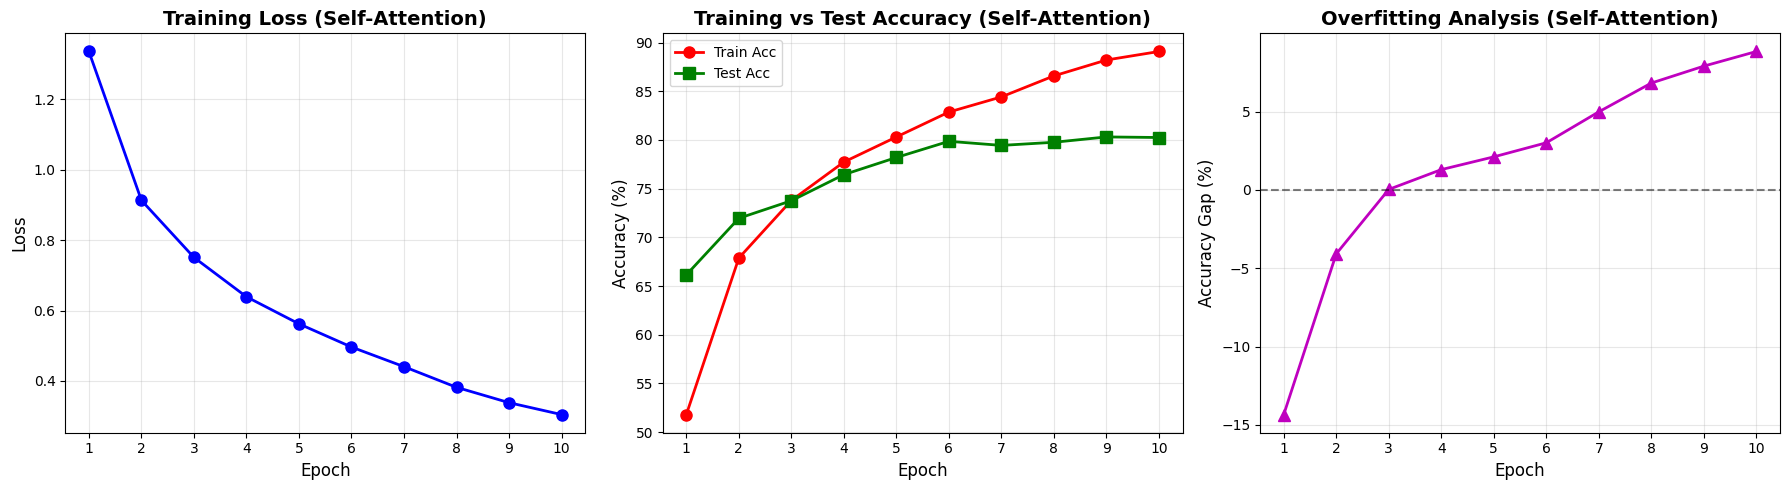


📊 IMPROVEMENT #5: SELF-ATTENTION - RESULTS SUMMARY
Baseline Test Accuracy: 73.42%
With Self-Attention: 80.25%
Improvement: 6.83%
Number of parameters: 647,973

Attention mechanism benefits:
  - Captures long-range spatial dependencies
  - Focuses on discriminative features
  - Improves feature representation
✅ Model saved as 'cifar10_self_attention.pth'

✅ Experiment #5 completed! All CIFAR-10 improvements finished.


In [ ]:
# ============================================================================
# CIFAR-10 Improvement #5: Self-Attention Mechanism
# Baseline Test Accuracy: 73.42%
# ============================================================================

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ============================================================================
# 1. Data Preparation
# ============================================================================

transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2470, 0.2435, 0.2616)
    )
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2470, 0.2435, 0.2616)
    )
])

# Load CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform_train
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform_test
)

# Create data loaders
trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

print(f"✅ Data loaded!")
print(f"Training samples: {len(trainset)}, Test samples: {len(testset)}")

# ============================================================================
# 2. Self-Attention Module Implementation
# ============================================================================

class SelfAttention(nn.Module):
    """
    Self-Attention mechanism for CNNs

    Key concepts:
    - Allows the model to focus on important spatial regions
    - Captures long-range dependencies in feature maps
    - Similar to attention in Transformers but adapted for spatial data

    Process:
    1. Generate Query (Q), Key (K), Value (V) from input features
    2. Compute attention scores: Attention(Q, K) = softmax(Q * K^T / sqrt(d))
    3. Apply attention to values: Output = Attention * V
    4. Residual connection: Final = Input + Attention_Output

    Benefits:
    - Better feature representation
    - Focuses on discriminative regions
    - Improves model's ability to capture context
    """
    def __init__(self, in_channels):
        super(SelfAttention, self).__init__()

        # Reduce channels for computational efficiency
        self.reduced_channels = in_channels // 8

        # Query, Key, Value projections (1x1 convolutions)
        self.query_conv = nn.Conv2d(in_channels, self.reduced_channels, kernel_size=1)
        self.key_conv = nn.Conv2d(in_channels, self.reduced_channels, kernel_size=1)
        self.value_conv = nn.Conv2d(in_channels, in_channels, kernel_size=1)

        # Learnable scaling parameter (gamma) for residual connection
        self.gamma = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        """
        Apply self-attention to input feature map

        Args:
            x: Input tensor of shape (batch, channels, height, width)

        Returns:
            out: Output tensor with attention applied (same shape as input)
        """
        batch_size, C, H, W = x.size()

        # Generate Query, Key, Value
        # Query: (batch, C//8, H, W) -> (batch, C//8, H*W) -> (batch, H*W, C//8)
        query = self.query_conv(x).view(batch_size, -1, H * W).permute(0, 2, 1)

        # Key: (batch, C//8, H, W) -> (batch, C//8, H*W)
        key = self.key_conv(x).view(batch_size, -1, H * W)

        # Value: (batch, C, H, W) -> (batch, C, H*W)
        value = self.value_conv(x).view(batch_size, -1, H * W)

        # Compute attention scores
        # attention: (batch, H*W, H*W) - represents relationship between all spatial positions
        attention = torch.bmm(query, key)  # Batch matrix multiplication
        attention = F.softmax(attention, dim=-1)  # Normalize across spatial dimensions

        # Apply attention to values
        # out: (batch, C, H*W)
        out = torch.bmm(value, attention.permute(0, 2, 1))

        # Reshape back to spatial dimensions
        out = out.view(batch_size, C, H, W)

        # Residual connection with learnable weight (gamma)
        # Allows model to control how much attention to apply
        out = self.gamma * out + x

        return out

# ============================================================================
# 3. CNN with Self-Attention
# ============================================================================

class AttentionCNN(nn.Module):
    """
    CNN with Self-Attention layers

    Architecture:
    - Conv blocks with increasing channels: 32 -> 64 -> 128
    - Self-attention after each conv block to capture spatial dependencies
    - Attention allows model to focus on discriminative features
    - Final classification layers

    Innovation:
    - Integrates self-attention into CNN architecture
    - Combines local feature extraction (conv) with global context (attention)
    """
    def __init__(self):
        super(AttentionCNN, self).__init__()

        # First convolutional block
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.attention1 = SelfAttention(32)  # Self-attention after conv1

        # Second convolutional block
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.attention2 = SelfAttention(64)  # Self-attention after conv2

        # Third convolutional block
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.attention3 = SelfAttention(128)  # Self-attention after conv3

        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)

        # Dropout for regularization
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        """
        Forward pass with attention-enhanced features

        Flow:
        1. Conv1 + BN + ReLU + Attention + Pool: 32x32 -> 16x16 (with attention)
        2. Conv2 + BN + ReLU + Attention + Pool: 16x16 -> 8x8 (with attention)
        3. Conv3 + BN + ReLU + Attention + Pool: 8x8 -> 4x4 (with attention)
        4. Flatten and FC layers for classification
        """
        # Block 1: Conv + BN + ReLU + Attention + Pool
        x = torch.relu(self.bn1(self.conv1(x)))
        x = self.attention1(x)  # Apply self-attention
        x = self.pool(x)  # 32x32 -> 16x16

        # Block 2: Conv + BN + ReLU + Attention + Pool
        x = torch.relu(self.bn2(self.conv2(x)))
        x = self.attention2(x)  # Apply self-attention
        x = self.pool(x)  # 16x16 -> 8x8

        # Block 3: Conv + BN + ReLU + Attention + Pool
        x = torch.relu(self.bn3(self.conv3(x)))
        x = self.attention3(x)  # Apply self-attention
        x = self.pool(x)  # 8x8 -> 4x4

        # Flatten
        x = x.view(-1, 128 * 4 * 4)

        # Fully connected layers
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Create model instance
model_attention = AttentionCNN().to(device)
print(f"✅ Attention-enhanced model created on {device}")

# Count parameters
total_params = sum(p.numel() for p in model_attention.parameters())
trainable_params = sum(p.numel() for p in model_attention.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# ============================================================================
# 4. Training Setup
# ============================================================================

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_attention.parameters(), lr=0.001, weight_decay=1e-4)

print("✅ Loss function and optimizer configured!")

# ============================================================================
# 5. Training Function
# ============================================================================

def train_model(model, trainloader, testloader, criterion, optimizer, epochs=10, model_name="Model"):
    """
    Train the model and track performance metrics

    Args:
        model: Neural network model
        trainloader: Training data loader
        testloader: Test data loader
        criterion: Loss function
        optimizer: Optimizer
        epochs: Number of training epochs
        model_name: Name for display purposes

    Returns:
        train_losses: List of average training losses per epoch
        train_accs: List of training accuracies per epoch
        test_accs: List of test accuracies per epoch
    """
    model.train()
    train_losses = []
    train_accs = []
    test_accs = []

    print(f"\n{'='*60}")
    print(f"Training {model_name}")
    print(f"{'='*60}\n")

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        for i, (inputs, labels) in enumerate(trainloader):
            # Move data to device (GPU/CPU)
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            # Print progress every 100 batches
            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(trainloader)}], '
                      f'Loss: {loss.item():.4f}, Acc: {100.*correct/total:.2f}%')

        # Calculate epoch metrics
        epoch_loss = running_loss / len(trainloader)
        epoch_acc = 100. * correct / total
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc)

        # Test after each epoch
        test_acc = test_model(model, testloader, verbose=False)
        test_accs.append(test_acc)

        print(f'\n📊 Epoch [{epoch+1}/{epochs}] Summary:')
        print(f'   Train Loss: {epoch_loss:.4f}')
        print(f'   Train Acc: {epoch_acc:.2f}%')
        print(f'   Test Acc: {test_acc:.2f}%')
        print(f'{"-"*60}\n')

    print(f"✅ Training completed for {model_name}!\n")
    return train_losses, train_accs, test_accs

# ============================================================================
# 6. Testing Function
# ============================================================================

def test_model(model, testloader, verbose=True):
    """
    Evaluate model on test set

    Args:
        model: Neural network model
        testloader: Test data loader
        verbose: Whether to print results

    Returns:
        accuracy: Test accuracy percentage
    """
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation for testing
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100. * correct / total

    if verbose:
        print(f'Test Accuracy: {accuracy:.2f}%')

    model.train()  # Switch back to training mode
    return accuracy

# ============================================================================
# 7. Train the Attention Model
# ============================================================================

print("🚀 Starting training with Self-Attention Mechanism...")
train_losses_attention, train_accs_attention, test_accs_attention = train_model(
    model_attention,
    trainloader,
    testloader,
    criterion,
    optimizer,
    epochs=10,
    model_name="CNN with Self-Attention"
)

# Final test
final_test_acc = test_model(model_attention, testloader, verbose=True)

# ============================================================================
# 8. Visualization
# ============================================================================

def plot_training_results(train_losses, train_accs, test_accs, title_suffix=""):
    """
    Plot training curves: loss and accuracy

    Args:
        train_losses: List of training losses
        train_accs: List of training accuracies
        test_accs: List of test accuracies
        title_suffix: Additional text for plot title
    """
    epochs_list = list(range(1, len(train_losses) + 1))

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Training Loss
    axes[0].plot(epochs_list, train_losses, 'b-o', linewidth=2, markersize=8)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].set_title(f'Training Loss {title_suffix}', fontsize=14, fontweight='bold')
    axes[0].set_xticks(epochs_list)
    axes[0].grid(True, alpha=0.3)

    # Training vs Test Accuracy
    axes[1].plot(epochs_list, train_accs, 'r-o', linewidth=2, markersize=8, label='Train Acc')
    axes[1].plot(epochs_list, test_accs, 'g-s', linewidth=2, markersize=8, label='Test Acc')
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Accuracy (%)', fontsize=12)
    axes[1].set_title(f'Training vs Test Accuracy {title_suffix}', fontsize=14, fontweight='bold')
    axes[1].set_xticks(epochs_list)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    # Overfitting Gap
    gap = [train_accs[i] - test_accs[i] for i in range(len(train_accs))]
    axes[2].plot(epochs_list, gap, 'm-^', linewidth=2, markersize=8)
    axes[2].set_xlabel('Epoch', fontsize=12)
    axes[2].set_ylabel('Accuracy Gap (%)', fontsize=12)
    axes[2].set_title(f'Overfitting Analysis {title_suffix}', fontsize=14, fontweight='bold')
    axes[2].set_xticks(epochs_list)
    axes[2].axhline(y=0, color='k', linestyle='--', alpha=0.5)
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'training_results{title_suffix.replace(" ", "_")}.png', dpi=150, bbox_inches='tight')
    plt.show()

# Plot results
plot_training_results(train_losses_attention, train_accs_attention, test_accs_attention,
                     title_suffix="(Self-Attention)")

# ============================================================================
# 9. Save Results
# ============================================================================

print("\n" + "="*60)
print("📊 IMPROVEMENT #5: SELF-ATTENTION - RESULTS SUMMARY")
print("="*60)
print(f"Baseline Test Accuracy: 73.42%")
print(f"With Self-Attention: {final_test_acc:.2f}%")
print(f"Improvement: {final_test_acc - 73.42:.2f}%")
print(f"Number of parameters: {total_params:,}")
print(f"\nAttention mechanism benefits:")
print(f"  - Captures long-range spatial dependencies")
print(f"  - Focuses on discriminative features")
print(f"  - Improves feature representation")
print("="*60)

# Save model
torch.save(model_attention.state_dict(), 'cifar10_self_attention.pth')
print("✅ Model saved as 'cifar10_self_attention.pth'")

# Save results to dictionary for later comparison
results_exp5 = {
    'name': 'Self-Attention',
    'test_accuracy': final_test_acc,
    'train_losses': train_losses_attention,
    'train_accs': train_accs_attention,
    'test_accs': test_accs_attention,
    'improvement': final_test_acc - 73.42,
    'parameters': total_params
}

print("\n✅ Experiment #5 completed! All CIFAR-10 improvements finished.")